In [9]:
import json
import os
from functools import partial
from time import sleep
import re

import pandas as pd
import pypsa
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyproj
from shapely.ops import transform, linemerge


import geopandas as gpd

In [18]:
tmp = gpd.read_file("data/pjm_system_map_export/substation_labels.geojson")

In [19]:
tmp.shape

(6343, 15)

In [20]:
tmp.columns

Index(['FAC_ID', 'MEMBER', 'NAME', 'STATE', 'SUBSTATION_GLOBALID',
       'SUBSTATION_TYPE', 'SYM_CODE', 'VOLTAGE', 'COMMERCIAL_ZONE',
       'PLANNING_ZONE_NAME', 'PJM_ZONE_GLOBALID', 'SHAPE', 'SUBSTATION_KEY',
       'ESRI_OID', 'geometry'],
      dtype='object')

In [22]:
tmp.tail()

,FAC_ID,MEMBER,NAME,STATE,SUBSTATION_GLOBALID,SUBSTATION_TYPE,SYM_CODE,VOLTAGE,COMMERCIAL_ZONE,PLANNING_ZONE_NAME,PJM_ZONE_GLOBALID,SHAPE,SUBSTATION_KEY,ESRI_OID,geometry
6338,Null,1,Clyde,Null,{F76EF8C3-210B-412E-B542-B966BA98EDD9},0,69,69,Null,Null,Null,Point,207151,260,POINT (-9235691.796 5057745.065)
6339,Null,1,Hopedale,Null,{5407E416-0DEE-4C2C-90BA-041FE8907FCB},0,69,69,Null,Null,Null,Point,212799,6337,POINT (-9006244.292 4912943.485)
6340,Null,1,Dupont St (AEP),Null,{4BBFAF4C-FE25-4954-8B9A-177FE347F85B},0,69,69,Null,Null,Null,Point,210747,6338,POINT (-8893618.616 4392250.573)
6341,GALEIL138,1,Galesburg,IL,{F2BDE4A6-C057-40CA-9541-855065BFCD07},0,138,138,Null,Null,Null,Point,71161,6339,POINT (-10055251.525 5008893.657)
6342,Null,1,Campbell Tap,Null,{117006B4-1491-4768-9927-B071A761A039},0,69,69,Null,Null,Null,Point,206755,6340,POINT (-8914555.214 5034085.474)


In [1]:
from helper_functions import _functions

dataLoader = _functions.PJMSystemMap()

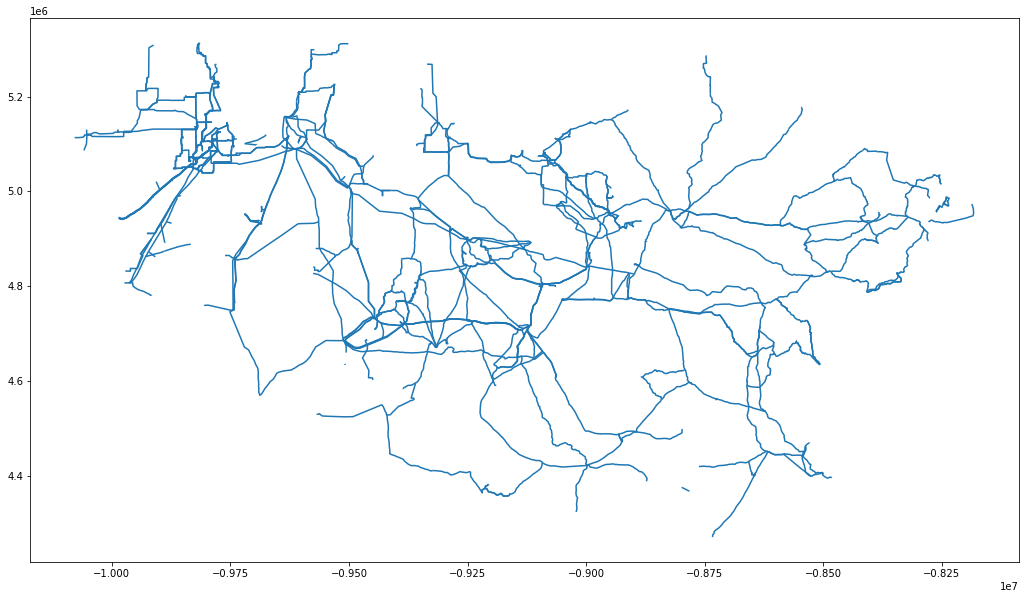

In [7]:
dataLoader.getPJMBackboneLines().plot(figsize=(25, 10))

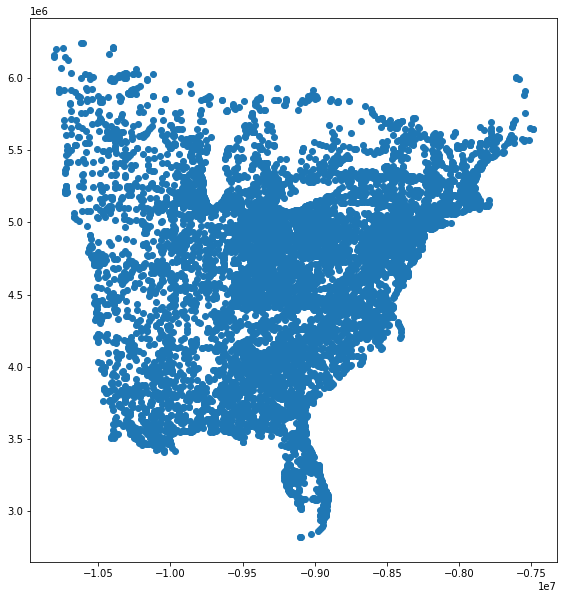

In [6]:
dataLoader.getAllSubstations().plot(figsize=(25, 10))

,FAC_ID,MEMBER,NAME,STATE,SUBSTATION_GLOBALID,SUBSTATION_TYPE,SYM_CODE,VOLTAGE,COMMERCIAL_ZONE,PLANNING_ZONE_NAME,PJM_ZONE_GLOBALID,SHAPE,SUBSTATION_KEY,ESRI_OID,geometry
0,TARBNC230,1,Tarboro,NC,{601DA022-360E-4A76-9A71-393591167991},0,230,230.0,Virginia Electric and Power Co.,Dominion,{538A5687-36A9-4109-B6AB-C0C45AD40C5B},Point,69554,17,POINT (-8631591.883 4285658.421)
1,FORMIL138,1,Ford Motor Company,IL,{E3B81B10-8CF9-4178-9ED4-4F801144A633},0,138,138.0,Commonwealth Edison Company,ComEd,{BDEE91D0-47D9-49A3-9589-CC0880AEE020},Point,69566,18,POINT (-9747431.205 5085660.340)
2,ALSIIL138,1,Alsip,IL,{E79A70FD-2EE4-4482-B6B7-A66FDB815BBF},0,138,138.0,Commonwealth Edison Company,ComEd,{BDEE91D0-47D9-49A3-9589-CC0880AEE020},Point,69640,19,POINT (-9769745.181 5112010.389)
3,AUBUIN138,1,Auburn,IN,{2011304B-F473-44B0-A559-3CB87B72D383},0,138,138.0,"American Electric Power Co., Inc.",AEP,{A75C0614-CCCE-477F-8D39-EDC045BE5016},Point,69738,20,POINT (-9467450.579 5065800.108)
4,AVONKY345,1,Avon,KY,{64CC92DD-07C8-40C6-A8AB-B172455EC213},0,345,345.0,Eastern Kentucky Power Cooperative,EKPC,{6E0C1E06-FCB3-403F-BE26-DFFFDFA31E5B},Point,69759,21,POINT (-9386554.412 4583675.109)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12868,BARNCT115,0,Barnum,CT,{5A5C8040-CDFB-47EE-8119-4E1A2808932B},0,115,115.0,NaN,NaN,NaN,Point,69799,6525,POINT (-8139691.523 5042719.071)
12869,TILDNY115,0,Tilden,NY,{36C271DA-7D08-4E73-BFC6-00B1E8DCCC14},0,115,115.0,NaN,NaN,NaN,Point,76504,6526,POINT (-8473819.082 5308035.606)
12870,ONEOAL230,0,Oneonta,AL,{077AF132-8363-4D09-A6A4-5B9651A16990},0,230,230.0,NaN,NaN,NaN,Point,72620,6527,POINT (-9623305.039 4014301.418)
12871,MINOMN115,0,Minorca,MN,{03C82718-D3E8-4160-8A30-C4F85EBFDE3B},0,115,115.0,NaN,NaN,NaN,Point,77607,6528,POINT (-10304270.171 6036019.763)


In [25]:
for x in tmp.SUBSTATION_GLOBALID.to_list():
    if x not in dataLoader.getAllSubstations()["SUBSTATION_GLOBALID"].to_list():
        print(x)

{6B9620F7-C828-4BF7-9003-8ED5111DD3C7}
{F2CE1C0B-5E6A-4ECA-9A4F-EF8CC665721D}


# Load Lines

In [33]:
# load data
with open('data/pjm_system_map_export/backbone_lines.json') as f:
    data = json.load(f)
print("number of data points:", len(data["results"]))

# check data
for x in data["results"]:
    if x["layerId"] != 9:
        raise("Failed layerId check!")
    if x["layerName"] != "Backbone Transmission Lines":
        raise("Failed layerName check!")
    if x["geometryType"] != "esriGeometryPolyline":
        raise("Failed geometryType check!")
    if len(x["geometry"]["paths"]) != 1:
        raise("Failed paths length check!")
print("passed data check")



# # load data
# with open('data/pjm_system_map_export/non_backbone_lines_120_138_161_230_kv.json') as f:
#     data2 = json.load(f)
# print("number of data points:", len(data2["results"]))

# # check data
# for x in data2["results"]:
#     if x["layerId"] != 10:
#         raise("Failed layerId check!")
#     if x["layerName"] != "Transmission Lines":
#         raise("Failed layerName check!")
#     if x["geometryType"] != "esriGeometryPolyline":
#         raise("Failed geometryType check!")
#     if len(x["geometry"]["paths"]) != 1:
#         raise("Failed paths length check!")
# print("passed data check")

# # add to data
# data["results"] += data2["results"]


# # load data
# with open('data/pjm_system_map_export/non_backbone_lines_69_115_kv.json') as f:
#     data3 = json.load(f)
# print("number of data points:", len(data3["results"]))

# # check data
# for x in data3["results"]:
#     if x["layerId"] != 10:
#         raise("Failed layerId check!")
#     if x["layerName"] != "Transmission Lines":
#         raise("Failed layerName check!")
#     if x["geometryType"] != "esriGeometryPolyline":
#         raise("Failed geometryType check!")
#     if len(x["geometry"]["paths"]) != 1:
#         raise("Failed paths length check!")
# print("passed data check")


# # add to data
# data["results"] += data3["results"]


# construct geojson
geojson = {
    "type": "FeatureCollection",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } }, # this is not the appropriate projection
    "features": [
    {
        "type": "Feature",
        "properties" : d["attributes"],
        "geometry" : {
            "type": "LineString",
            "coordinates": d["geometry"]["paths"][0],
            }
     } for d in data["results"]]
}

print("finished constructing geojson")

# write geojson to disk
output = open("data/pjm_system_map_export/lines.geojson", 'w')
json.dump(geojson, output)
output.close()
print("geojson file has been written out to disk!")

# load geojson as a geodataframe
lines = gpd.read_file("data/pjm_system_map_export/lines.geojson")
print("geojson file has been read as a geodataframe!")

# replace NULL and None values with NaN
lines = lines.replace({"Null": np.nan, None: np.nan, "":np.nan})

# convert voltage to float
lines.VOLTAGE = lines.VOLTAGE.astype(float)

number of data points: 732
passed data check
finished constructing geojson
geojson file has been written out to disk!
geojson file has been read as a geodataframe!


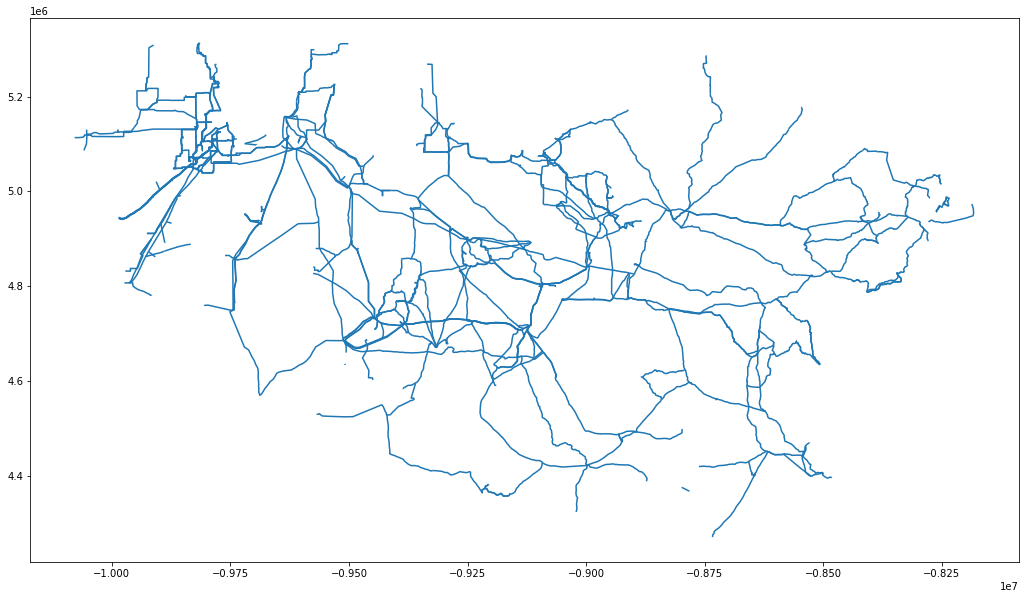

In [3]:
lines.geometry.plot(figsize=(25, 10))

In [4]:
lines.head()

,COMPANY_ID,LENGTH_KM,LINE_ID,MEMBER,MILES,NAME,SUBSTATION_A_GLOBALID,SUBSTATION_B_GLOBALID,SYM_CODE,TO_LINE_NAME,TRANSMISSION_LINE_GLOBALID,VOLTAGE,SHAPE,TRANSMISSION_LINE_KEY,ESRI_OID,geometry
0,04110,13.627528,WAUKIL138:ZIONIL345:2,1,8.465586,Commonwealth Edison Co.,{6F30A23A-8426-4B5F-B46A-DAB5717422C7},{C7DE375B-8E8A-455B-B8C2-D403A473B656},345,L2218,{77930912-B3A4-4C1E-9C61-6252FA7E111D},345,Polyline,42166,351,"LINESTRING (-9774800.862 5227865.203, -9774570..."
1,NaN,NaN,NaN,1,NaN,FREEDOM2-SHICKSHI FREE-SHI,{2D137659-77F6-4FC6-B0F4-1111715979BB},{E7E7CF93-6215-48D3-AEF7-ECFC94B02645},500,NaN,{A519B19A-7C6C-4A7C-80E3-C4B022EB64DE},500,Polyline,186828,352,"LINESTRING (-8475350.508 5037155.514, -8477189..."
2,04110,55.627734,BRAIIL345:LASAIL345:2,1,34.556623,Commonwealth Edison Co.,{2FE47BD4-A39C-4C31-874D-494E2889996A},{3832C46E-FCF4-47DC-B690-92830EC979EB},345,0104,{D35AD821-B1CC-4360-8AB7-3EF2462C496F},345,Polyline,33083,353,"LINESTRING (-9821787.194 5046419.326, -9821723..."
3,NaN,NaN,NaN,1,NaN,HUNTERST-VINCO HUN-VIN,{279225ED-7BD3-4E78-AA8F-432DCCF6B2AC},{AB34DDAA-16A4-4403-A4AD-18605F8EA5F2},500,NaN,{0FCACCCF-DBCA-43C4-A37C-DA7048101165},500,Polyline,178006,354,"LINESTRING (-8778265.828 4926209.949, -8776987..."
4,09208,25.919083,GOOSIL345:TAP737IL345:1,1,16.101248,Illinois Power Co.,NaN,NaN,345,NaN,{C8BA52B8-20D2-4003-AFAD-B7C9433E5FD8},345,Polyline,41241,355,"LINESTRING (-9889212.457 4873756.303, -9884181..."


# Load Substation

In [5]:
# load data
with open('data/pjm_system_map_export/substation.json') as f:
    data = json.load(f)
print("number of data points:", len(data["results"]))


# check data
for x in data["results"]:
    if x["layerId"] != 2:
        raise("Failed layerId check!")
    if x["layerName"] != "Substations":
        raise("Failed layerName check!")
    if x["geometryType"] != "esriGeometryPoint":
        raise("Failed geometryType check!")
print("passed data check")


# load data
with open('data/pjm_system_map_export/substation_non_member.json') as f:
    data2 = json.load(f)
print("number of data points:", len(data2["results"]))


# check data
for x in data2["results"]:
    if x["layerId"] != 26:
        raise("Failed layerId check!")
    if x["layerName"] != "Non-Member Substations":
        raise("Failed layerName check!")
    if x["geometryType"] != "esriGeometryPoint":
        raise("Failed geometryType check!")
print("passed data check")

# add to data
data["results"] += data2["results"]


# construct geojson
geojson = {
    "type": "FeatureCollection",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } }, # this is not the appropriate projection
    "features": [
    {
        "type": "Feature",
        "properties" : d["attributes"],
        "geometry" : {
            "type": "Point",
            "coordinates": [d["geometry"]["x"], d["geometry"]["y"]],
            }
     } for d in data["results"]]
}

print("finished constructing geojson")


# write geojson to disk
output = open("data/pjm_system_map_export/substation.geojson", 'w')
json.dump(geojson, output)
output.close()
print("geojson file has been written out to disk!")

# load geojson as a geodataframe
substations = gpd.read_file("data/pjm_system_map_export/substation.geojson")
print("geojson file has been read as a geodataframe!")

# drop duplicates
substations = substations.drop_duplicates()

# replace NULL and None values with NaN
substations = substations.replace({"Null": np.nan, None: np.nan, "":np.nan})

number of data points: 6341
passed data check
number of data points: 6532
passed data check
finished constructing geojson
geojson file has been written out to disk!
geojson file has been read as a geodataframe!


In [6]:
# substations.geometry.plot(figsize=(15, 10))

In [7]:
# substations.head()

In [8]:
# check if any substations in lines can't be found in the substation list

for x in lines.SUBSTATION_A_GLOBALID.unique():
    if x not in substations.SUBSTATION_GLOBALID.unique():
        print(x)

print()

for x in lines.SUBSTATION_B_GLOBALID.unique():
    if x not in substations.SUBSTATION_GLOBALID.unique():
        print(x)

nan

nan
{C1B8B982-30DB-4CB0-8ABE-07AA5ED59FE9}
{5DA81B32-4CF2-4253-BEAD-4E60375DBB6C}
{14AD9BDD-513B-439D-9DEB-DBE59F014A88}


In [ ]:
# TODO: add substations not 

# Map Substations in System Map to PNodes

In [9]:
# load substation labels

with open('data/pjm_system_map_export/substation_labels.json') as f:
    data = json.load(f)
print("number of data points:", len(data["results"]))


# check data
for x in data["results"]:
    if x["layerId"] != 3:
        raise("Failed layerId check!")
    if x["geometryType"] != "esriGeometryPoint":
        raise("Failed geometryType check!")
print("passed data check")


# construct geojson
geojson = {
    "type": "FeatureCollection",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } }, # this is not the appropriate projection
    "features": [
    {
        "type": "Feature",
        "properties" : d["attributes"],
        "geometry" : {
            "type": "Point",
            "coordinates": [d["geometry"]["x"], d["geometry"]["y"]],
            }
     } for d in data["results"]]
}

print("finished constructing geojson")


# write geojson to disk
output = open("data/pjm_system_map_export/substation_labels.geojson", 'w')
json.dump(geojson, output)
output.close()
print("geojson file has been written out to disk!")

# load geojson as a geodataframe
substation_labels = gpd.read_file("data/pjm_system_map_export/substation_labels.geojson")
print("geojson file has been read as a geodataframe!")

# replace NULL and None values with NaN
substation_labels = substation_labels.replace({"Null": np.nan, None: np.nan, "":np.nan})

number of data points: 6343
passed data check
finished constructing geojson
geojson file has been written out to disk!
geojson file has been read as a geodataframe!


In [10]:
# zone by zone and voltage level by voltage level

# load pnode_list
node_list = pd.read_excel("data/lmp-bus-model.xlsx", skiprows=2)
node_list.Voltage = node_list.Voltage.apply(lambda x: float(x.replace("KV", "")))
node_list.columns = ["pnode_id", "zone", "substation", "voltage", "equipment", "type"]
node_list.substation = node_list.substation.astype(str)


# replace zonal name to accomodate matching with equiplist
zonalMap = {'AECO': "AEC",
            'AEP': "AEP",
            'APS': "APS",
            'ATSI': "ATSI",
            'BGE': "BGE",
            'COMED': "ComEd",
            'DAY': "Dayton",
            'DEOK': "DEOK",
            'DOM': "Dominion",
            'DPL': "DPL",
            'DUQ': "DL",
            'EKPC': "EKPC",
            'JCPL': "JCPL",
            'METED': "ME",
            'OVEC': "OVEC HQ",
            'PECO': "PECO",
            'PENELEC': "PENELEC",
            'PEPCO': "PEPCO",
            'PPL': "PPL",
            'PSEG': "PSEG",
            'RECO': "RE"}

node_list.zone = node_list.zone.replace(zonalMap)

In [11]:
# check that zone are one-one match between the two dataframes

for x in node_list.zone.unique():
    if x not in substation_labels.PLANNING_ZONE_NAME.to_list():
        print(x)

for x in substation_labels.PLANNING_ZONE_NAME.dropna().unique():
    if x not in node_list.zone.to_list():
        print(x)

In [12]:
# convert raw pjm zone json data exported from system map to geojson for geopandas ingesting

# load pjm zones
with open('data/pjm_system_map_export/pjm_zone.json') as f:
    zone = json.load(f)
    
print("number of zones:", len(zone["results"]))


# check data
for x in zone["results"]:
    if x["layerId"] != 17:
        raise("Failed layerId check!")
    if x["layerName"] != "PJM Zones":
        raise("Failed layerName check!")
    if x["geometryType"] != "esriGeometryPolygon":
        raise("Failed geometryType check!")


# construct geojson
geojson = {
    "type": "FeatureCollection",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
    "features": []
}


# add to geojson
for d in zone["results"]:
    tmp = {"type": "Feature", "properties" : d["attributes"], "geometry":{"type": None, "coordinates": None}}
    
    if len(d["geometry"]["rings"]) == 1 or d["value"] == "EKPC": #TODO: hardcoding EKPC for now, which is a donut shape
        tmp["geometry"]["type"] = "Polygon"
        geojson["features"].append(tmp)
        tmp["geometry"]["coordinates"] = d["geometry"]["rings"]
    else:
        tmp["geometry"]["type"] = "MultiPolygon"
        geojson["features"].append(tmp)
        tmp["geometry"]["coordinates"] = [[x] for x in d["geometry"]["rings"]]
    

# write geojson to disk
output = open("data/pjm_system_map_export/pjm_zone.geojson", 'w')
json.dump(geojson, output)
output.close()
print("geojson file has been written out to disk!")

# load geojson as a geodataframe
pjm_zone = gpd.read_file("data/pjm_system_map_export/pjm_zone.geojson")
print("geojson file has been read as a geodataframe!")

# replace NULL and None values with NaN
pjm_zone = pjm_zone.replace({"Null": np.nan, None: np.nan, "":np.nan})


number of zones: 21
geojson file has been written out to disk!
geojson file has been read as a geodataframe!


In [13]:
# matched substation to zone based on geoemtry

zoneGeometryMap = dict(zip(pjm_zone.PLANNING_ZONE_NAME, pjm_zone.geometry))

substation_labels["matched_zone"] = np.nan

for index, row in substation_labels.iterrows():
    if row["NAME"] is not np.nan:
        for zone, geometry in zoneGeometryMap.items():
            if row["geometry"].within(geometry):
                substation_labels.loc[index, "matched_zone"] = zone

In [14]:
# set up weighted levenshtein score
from weighted_levenshtein import lev

insert_costs = np.full((128,), 1, dtype=np.float64)
delete_costs = np.full((128,), 5, dtype=np.float64)
substitute_costs = np.full((128, 128), 99999, dtype=np.float64)

def weighted_lev(word1, word2):
    return lev(word1, word2,
               insert_costs=insert_costs,
               delete_costs=delete_costs,
               substitute_costs=substitute_costs)


def find_match(word1, choices):
    tmp_word1 = word1.lower()
    tmp_choices = list(map(lambda x: x.lower(), choices))
    scores = list(map(lambda x: weighted_lev(tmp_word1, x), tmp_choices))
    min_index = scores.index(min(scores))
    return (choices[min_index], scores[min_index])


# find_match("FELCTY", ['Taylor', 'Felicity'])

In [15]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# matching
# as more matches ahppen, gradually decrease in the threshold for fuzzy match
# the idea is to match with gradually decreasing confidence

# first iteration: perfect match confidence, zone matches or voltage matches
# second iteration: high match confidence, zone matches or voltage matches
# third iteration: high match confidence
# fourth iteration: intermediate match confidence
# fifth iteration: remaining substations

# revise substation_labels dataframe as needed
substation_labels["VOLTAGE"] = substation_labels.VOLTAGE.astype(float)
substation_labels = substation_labels.drop_duplicates()
substation_labels["NAME"] = substation_labels["NAME"].astype(str).apply(lambda x: re.sub(r'[^\w]', '', x))

# initialize dictionaries and lists
yet_to_be_matched_sublabels = substation_labels.SUBSTATION_GLOBALID.to_list()
yet_to_be_matched_nodes = node_list.groupby("substation")["zone"].unique().to_dict()
mapping = {}


# # get pnode and list of voltages using pnode_list and equiplist
# node_voltage_map = {}
# for x in node_list.substation.unique():
#     tmp_voltage = equiplist[equiplist.STATION == x].VOLTAGE.apply(lambda x: float(x.replace(" KV", ""))).unique()
#     node_voltage_map[x] = tmp_voltage


matching_iterations = {
    0: {"threshold": 100, "zone_check": True, "fuzz score": True, "description": "exact match in same zone"},
    1: {"threshold": 90, "zone_check": True, "fuzz score": True, "description": "high match in same zone"},
    2: {"threshold": 95, "zone_check": False, "fuzz score": True, "description": "high match in all zones"},
    3: {"threshold": 5, "zone_check": True, "fuzz score": False, "description": "medium match in same zone with weighted levenshtein"},
    4: {"threshold": 5, "zone_check": False, "fuzz score": False, "description": "medium match in same zone with weighted levenshtein"},
    5: {"threshold": 10, "zone_check": True, "fuzz score": False, "description": "low match in same zone with weighted levenshtein"},
    6: {"threshold": np.inf, "zone_check": False, "fuzz score": False, "description": "remaining same zone with weighted levenshtein"}
}


for index, threshold in enumerate([100, 90, 95, 5, 5, 10, np.inf]):

    for name in list(yet_to_be_matched_nodes):
        # TODO: need to add condition to skip substations that do not have >= 69 voltages

        zone = yet_to_be_matched_nodes[name]
        
        tmp_sub_labels = substation_labels[substation_labels.SUBSTATION_GLOBALID.isin(yet_to_be_matched_sublabels)]

        # TODO: tmp. adding zone check here
        if index in [0, 1, 3, 5]:
            tmp_sub_labels = tmp_sub_labels[(tmp_sub_labels.PLANNING_ZONE_NAME.isin(zone)) | (tmp_sub_labels.matched_zone.isin(zone))]

        # TODO: the fix below is temporary to avoid exception
        if tmp_sub_labels.shape[0] == 0:
            continue
            
        # preprocessing
        if ("ComEd" in zone) and bool(re.match(r"^\d+\s+(\w+)$", name)):
            # COMED's naming convention makes it difficult, and need to be handled separately
            tmp_name = re.search(r"^\d+\s+(\w+)$", name).group(1)        
        elif (("ATSI" in zone) or ("DEOK" in zone) or ("Dayton" in zone)) and bool(re.match(r"^\d+(\w+)$", name)):
             # ATSI, DEOK, and Dayton have naming convention that starts with digits, which make matching difficult
            tmp_name = re.search(r"^\d+(\w+)$", name).group(1)
        else:
            tmp_name = name

        choices = tmp_sub_labels["NAME"].dropna().to_list() # TODO: currently dropping nan, considering replacing with "", i.e. empty string
        
        if index < 3:
            match = process.extractOne(tmp_name, choices)
        else:
            tmp_name = tmp_name.replace("_", "")
            match = find_match(tmp_name, choices)

        if index < 3 and match[1] < threshold:
            continue
        
        if index >= 3 and match[1] > threshold:
            continue
        

        # get substation id and name from substation_labels
        sub_id = tmp_sub_labels[tmp_sub_labels.NAME == match[0]]["SUBSTATION_GLOBALID"].values[0]
        sub_name = tmp_sub_labels[tmp_sub_labels.NAME == match[0]]["NAME"].values[0]

        # add to dictionary
        mapping[name] = (sub_name, zone, sub_id, match[1], index)

        # remove from list and dicionaries
        yet_to_be_matched_sublabels.remove(sub_id)
        del yet_to_be_matched_nodes[name]
    
    # print the iteration number and current number of matching
    print(index, len(mapping.keys()))

0 1723
1 2971
2 3011
3 4084
4 4216
5 4698
6 5427


In [16]:
substation_pnode_match = pd.DataFrame(mapping).T
substation_pnode_match.columns = ["system_map_substation_name", "pnode_zone",
                                  "system_map_substation_id",
                                  "match_score", "match_round"]

In [17]:
# TODO: currently using only the most truthworthy match, which are from the first few rounds

substation_pnode_match = substation_pnode_match[substation_pnode_match.match_round.isin([0, 1, 2, 3])]

# Map System Map Lines to Line Rating

In [18]:
# merge line_rating with equiplist
# TODO: currently averaging line rating over different conditions, consider improving this in the future

# load equipment list
equiplist = pd.read_csv("data/oasis/equiplist.csv", skiprows=1)
equiplist["VOLTAGE"] = equiplist["VOLTAGE"].apply(lambda x: float(x.replace("KV", "")))

# load line rating
line_rating = pd.read_csv("data/oasis/line_rating.csv")

# merge equiplist with line rating
# TODO: currently just averaging line rating
line_rating = line_rating.groupby(["company", "substation", "voltage", "device", "end", "description"]).mean()
line_rating = line_rating[["day_normal"]]
equiplist = pd.merge(equiplist, line_rating, left_on="LONG NAME", right_on="description", how="left")
line_equiplist = equiplist[equiplist.TYPE == "LINE"].copy()

In [19]:
# for missing substations in system map, do distance-based matching

# TODO: first, do matching for those with only 1 substation missing
for index, row in lines[lines.SUBSTATION_A_GLOBALID.isnull() ^ lines.SUBSTATION_B_GLOBALID.isnull()].iterrows():
    matched_subs = substations[substations.geometry.apply(lambda x: x.distance(lines.geometry.loc[index])) == 0]
    matched_subs = matched_subs["SUBSTATION_GLOBALID"].to_list()
    
    for sub in matched_subs:
        if sub == row["SUBSTATION_A_GLOBALID"] or sub == row["SUBSTATION_B_GLOBALID"]:
            continue
        elif row["SUBSTATION_A_GLOBALID"] is np.nan:
            lines.loc[index, "SUBSTATION_A_GLOBALID"] = sub
        elif row["SUBSTATION_B_GLOBALID"] is np.nan:
            lines.loc[index, "SUBSTATION_B_GLOBALID"] = sub
        else:
            print("Hmm, there's a problem here. Line index:", index)


# TODO: second, do matching for those with both substations missing
for index, row in lines[lines.SUBSTATION_A_GLOBALID.isnull() & lines.SUBSTATION_B_GLOBALID.isnull()].iterrows():
    matched_subs = substations[substations.geometry.apply(lambda x: x.distance(lines.geometry.loc[index])) == 0]
    matched_subs = matched_subs["SUBSTATION_GLOBALID"].to_list()
    
    # insert match information into dataframe
    if len(matched_subs) > 0:
        lines.loc[index, "SUBSTATION_A_GLOBALID"] = matched_subs[0]
    
    if len(matched_subs) > 1:
        lines.loc[index, "SUBSTATION_B_GLOBALID"] = matched_subs[1]
    
    if len(matched_subs) > 2:
        print("Hmm, there's a problem here. Line index:", index)

         
# # TODO: for duplicated lines (same substation set) that somehow become fragmented, reconnect
# index_to_be_dropped = []

# lines_dict = lines.to_dict(orient="index")

# for index, row in lines_dict.items():
#     subA = row["SUBSTATION_A_GLOBALID"]
#     subB = row["SUBSTATION_B_GLOBALID"]
    
#     tmp = lines[(lines["SUBSTATION_A_GLOBALID"] == subA) & (lines["SUBSTATION_B_GLOBALID"] == subB)]
#     start_pts = set(x.coords[0] for x in tmp.geometry.to_list())
#     end_pts = set(x.coords[-1] for x in tmp.geometry.to_list())
    
#     if tmp.shape[0] > 1 and len(line_names) == 1 and (len(start_pts) > 1 or len(end_pts) > 1) and start_pts != end_pts:
#         lines_dict[index]["geometry"] = linemerge(tmp.geometry.to_list()) #TODO: need to QA on whether this actually merges the line
#         #TODO: seems to also create MultiLineString that's problematic
#         index_to_be_dropped += [x for x in tmp.index if x != index]
#         continue
        
#     tmp = lines[(lines["SUBSTATION_A_GLOBALID"] == subB) & (lines["SUBSTATION_B_GLOBALID"] == subA)]
#     start_pts = set(x.coords[0] for x in tmp.geometry.to_list())
#     end_pts = set(x.coords[-1] for x in tmp.geometry.to_list())

#     if tmp.shape[0] > 0 and len(line_names) == 1 and (len(start_pts) > 1 or len(end_pts) > 1) and start_pts != end_pts:
#         lines_dict[index]["geometry"] = linemerge(tmp.geometry.to_list()) #TODO: need to QA on whether this actually merges the line
#         #TODO: seems to also create MultiLineString that's problematic
#         index_to_be_dropped += [x for x in tmp.index if x != index]
#         linemerge(tmp.geometry.to_list())
#         continue

# lines = gpd.GeoDataFrame(lines_dict).T
# lines = lines.drop(index_to_be_dropped, axis=0)

In [20]:
# merge lines and substations to produce a new dataframe

lines_tmp = lines[["TRANSMISSION_LINE_GLOBALID", "SUBSTATION_A_GLOBALID",
                   "SUBSTATION_B_GLOBALID", "VOLTAGE"]]
sub_tmp = substation_labels[["NAME", "SUBSTATION_GLOBALID"]]

line_sub = pd.merge(lines_tmp, sub_tmp, how="left",
                    left_on="SUBSTATION_A_GLOBALID", right_on="SUBSTATION_GLOBALID",
                    suffixes=("_LINE", "_SUBSTATION_A"))

line_sub = pd.merge(line_sub, sub_tmp, how="left",
                    left_on="SUBSTATION_B_GLOBALID", right_on="SUBSTATION_GLOBALID",
                    suffixes=("_SUBSTATION_A", "_SUBSTATION_B"))

line_sub = line_sub.drop(columns=["SUBSTATION_GLOBALID_SUBSTATION_A", "SUBSTATION_GLOBALID_SUBSTATION_B"])

line_sub.VOLTAGE = line_sub.VOLTAGE.astype(float)

In [21]:
# for the lines equipment list, separate and obtain the information on the two connected substations
# this is for matching purpose later where we match system map with equiplist based on substation names

# add column for subA, subB
line_equiplist["cleaned_long_name"] = np.nan

equiplist_sub_list = list(equiplist.STATION.unique())

# find subA and subB for line
# TODO: currently some substations are missing, come back to fix it by adding more logic to parsing
for index, row in line_equiplist.iterrows():
    subA = row["STATION"]
    longName = row["LONG NAME"]
    
    longName = re.sub(r'\s+-', '-', longName) # experimenting, eliminating white space before -
    
    found = False
    
    # subA-subB somethingsomething
    for subB in equiplist_sub_list:
        longName_tmp = "-".join([subA, subB]) + " "
        if longName_tmp in longName:
            found = True
            line_equiplist.loc[index, "cleaned_long_name"] = longName_tmp.strip()
            break
    
    # subA-subB
    if not found:
        for subB in equiplist_sub_list:
            longName_tmp = "-".join([subA, subB])
            if longName_tmp == longName:
                found = True
                line_equiplist.loc[index, "cleaned_long_name"] = longName_tmp.strip()
                break
    
    # subB\s or subB
    if not found:
        for subB in equiplist_sub_list:
            if (subB + " ") in longName or bool(re.search(r"{}$".format(subB), longName)):
                found = True
                longName_tmp = "-".join([subA, subB])
                line_equiplist.loc[index, "cleaned_long_name"] = longName_tmp.strip()
                break
    
    # ends in subB\d
    if not found:
        for subB in equiplist_sub_list:
            if bool(re.search(r"{}\d($|\s)".format(subB), longName)):
                found = True
                longName_tmp = "-".join([subA, subB])
                line_equiplist.loc[index, "cleaned_long_name"] = longName_tmp.strip()
                break
    
    # replacce NAME existing in LONG NAME
    if not found:
        if row["NAME"] in row["LONG NAME"]:
            line_equiplist.loc[index, "cleaned_long_name"] = row["LONG NAME"].replace(row["NAME"], "")

line_equiplist.isnull().sum()

TYPE                     0
COMPANY                  0
ZONE                     0
STATION                  0
VOLTAGE                  0
NAME                     0
LONG NAME                0
day_normal           10395
cleaned_long_name      590
dtype: int64

In [22]:
# match system map with equiplist based on substation names

# TODO: fillna, but not sure if this is the most optimal way
line_equiplist["cleaned_long_name"] = line_equiplist["cleaned_long_name"].fillna(line_equiplist["LONG NAME"])

# initialize dictionaries and lists
mapping = {}
 
# iterate over voltage level
for voltage in sorted(list(line_sub["VOLTAGE"].unique()), reverse=True):
    # TODO: skip 1000 kv for now. Maybe another better way to deal with it.
    if voltage == 1000:
        continue
    
    # TODO: haven't done substation proxy matching yet
    # drop nan for now
    tmp_lines = line_sub[line_sub.VOLTAGE == voltage].dropna()
    tmp_line_equiplist = line_equiplist[line_equiplist["VOLTAGE"] == voltage]
    
    yet_to_be_matched_map_lines = dict(zip(tmp_lines["TRANSMISSION_LINE_GLOBALID"], tmp_lines["NAME_SUBSTATION_A"] + " " + tmp_lines["NAME_SUBSTATION_B"]))
    yet_to_be_matched_equiplist_lines = dict(zip(tmp_line_equiplist["cleaned_long_name"], tmp_line_equiplist["day_normal"]))
    

    for threshold in [90, 80, 70, 60, 50, 40, 0]:
        
        for line_id in list(yet_to_be_matched_map_lines):
            line_name = yet_to_be_matched_map_lines[line_id]
            
            
            if line_name is np.nan:
                continue

            match = process.extractOne(line_name, yet_to_be_matched_equiplist_lines.keys(), scorer=fuzz.WRatio)

            if match[1] > threshold:
                # add to dictionary
                mapping[line_id] = (line_name, match[0], match[1], yet_to_be_matched_equiplist_lines[match[0]])

                # remove from list and dicionaries
                del yet_to_be_matched_map_lines[line_id]
                del yet_to_be_matched_equiplist_lines[match[0]]

In [35]:
line_rating_map = pd.DataFrame(mapping).T
line_rating_map = line_rating_map.reset_index()
line_rating_map.columns = ["line_id", "line_sytem_map_name", "line_equiplist_name", "match_confidence", "line_rating"]

# TODO: currently only choosing high confidence match
line_rating_map = line_rating_map[line_rating_map.match_confidence >= 80]

# merge line_rating with system map
lines = pd.merge(lines, line_rating_map, how="left",
                 left_on="TRANSMISSION_LINE_GLOBALID", right_on="line_id")

# TODO: fill lines that don't have liner ratin for now
line_rating_fill = {1000: 750, 765:4000, 500:3000, 345:1250}

# TODO: get this earlier
lines.VOLTAGE = lines.VOLTAGE.astype(float)

for voltage_level, replacement_value in line_rating_fill.items():
    masks = lines[lines.VOLTAGE == voltage_level].index
    lines.loc[masks, "line_rating"] = lines.loc[masks, "line_rating"].fillna(replacement_value)

In [ ]:
# QA/QC
# are all lines in equiplist present in pjm system map?
# are all lines in pjm system map present in equiplist?

# after mapping, manual review those match with low fuzzy match/levenshtein score

# use existing zipcode mapping to do QA/QC

# Load Generation (Planning Queue & EIA)

In [ ]:
# TODO:
# Currently only using EIA data as a proxy

In [1014]:
# # load planning queue data

# # load data
# with open('data/pjm_system_map_export/queue.json') as f:
#     data = json.load(f)
# print("number of data points:", len(data["results"]))


# # check data
# for x in data["results"]:
#     if x["layerId"] != 0:
#         raise("Failed layerId check!")
#     if x["layerName"] != "Queues":
#         raise("Failed layerName check!")
#     if x["geometryType"] != "esriGeometryPoint":
#         raise("Failed geometryType check!")
# print("passed data check")


# # construct geojson
# geojson = {
#     "type": "FeatureCollection",
#     "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } }, # this is not the appropriate projection
#     "features": [
#     {
#         "type": "Feature",
#         "properties" : d["attributes"],
#         "geometry" : {
#             "type": "Point",
#             "coordinates": [d["geometry"]["x"], d["geometry"]["y"]],
#             }
#      } for d in data["results"]]
# }

# print("finished constructing geojson")


# # write geojson to disk
# output = open("data/pjm_system_map_export/queue.geojson", 'w')
# json.dump(geojson, output)
# output.close()
# print("geojson file has been written out to disk!")

# # load geojson as a geodataframe
# queue = gpd.read_file("data/pjm_system_map_export/queue.geojson")
# print("geojson file has been read as a geodataframe!")

# # replace NULL and None values with NaN
# queue = queue.replace({"Null": np.nan, None: np.nan, "":np.nan})

# # load queue information exported from PJM as excel
# queue_info = pd.read_excel("data/PlanningQueues_05_25_2020.xlsx")
# queue_merged = pd.merge(queue, queue_info, how="left", left_on="QUEUE_ID", right_on="Queue Number")
# columns = ["QUEUE_ID", "Name", "MFO", "MW Energy", "MW Capacity", "VOLTAGE",
#            "MW In Service", "Project Type", "Fuel", "Status", "Revised In Service Date",
#            "Actual In Service Date", "geometry"]
# queue_merged = queue_merged[columns]
# queue_merged = queue_merged[queue_merged["Status"] == "In Service"]
# print("finished merging queue geojson and queue planning info")
# print("number of data points:", queue_merged.shape[0])

In [1015]:
# queue_merged.geometry.plot(figsize=(25, 5))

In [1016]:
# queue_merged.head(3)

In [39]:
# using EIA 860 to map generators to node and coordinates
# currently using the 2018 data

# load data
eia_860_plant = pd.read_excel("data/eia8602018/2___Plant_Y2018.xlsx", skiprows=1)
eia_860_gens = pd.read_excel("data/eia8602018/3_1_Generator_Y2018.xlsx", skiprows=1).iloc[:-1, :]
eia_860_plant["Plant Code"] = eia_860_plant["Plant Code"].astype(int)
eia_860_gens["Plant Code"] = eia_860_gens["Plant Code"].astype(int)


# # select relevant columns
eia_860_gens = eia_860_gens[["Plant Code", "Generator ID", "Unit Code", "Technology", "Prime Mover",
                             "RTO/ISO LMP Node Designation",
                             "RTO/ISO Location Designation for Reporting Wholesale Sales Data to FERC"]]

eia_860_plant = eia_860_plant[["Plant Code", "Plant Name", "Street Address", "City", "County", "State",
                               "Latitude", "Longitude", "Balancing Authority Name",
                               "Transmission or Distribution System Owner"]]

# check overlapping values
# how many plants that are not in gens?
plant_code_not_found = []
for x in eia_860_plant["Plant Code"].unique():
    if x not in eia_860_gens["Plant Code"].unique():
        plant_code_not_found.append(x)
print("in '2___Plant' but no in '3_1_Generator':", len(plant_code_not_found))

# how many in gens that are not in plant?
plant_code_not_found = []
for x in eia_860_gens["Plant Code"].unique():
    if x not in eia_860_plant["Plant Code"].unique():
        plant_code_not_found.append(x)
print("in '3_1_Generator' but not in '2___Plant':", len(plant_code_not_found))

# merge dataframe and select PJM
plants = pd.merge(eia_860_plant, eia_860_gens, on="Plant Code", how="outer")
plants["Plant Code"] = plants["Plant Code"].astype(str)
plants = plants[plants["Balancing Authority Name"] == "PJM Interconnection, LLC"]

# eliminate rows that do not have coordinates
# TODO: figure out if there are other ways to get coordinates
plants = plants[(plants.Longitude != " ") & (plants.Latitude != " ")]

# construct geodataframe
plants = gpd.GeoDataFrame(plants, geometry=gpd.points_from_xy(plants.Longitude, plants.Latitude))

# convert projection
plants.crs = 4326
plants = plants.to_crs(epsg = 3857)

in '2___Plant' but no in '3_1_Generator': 1801
in '3_1_Generator' but not in '2___Plant': 0


In [40]:
plants.head(3)

,Plant Code,Plant Name,Street Address,City,County,State,Latitude,Longitude,Balancing Authority Name,Transmission or Distribution System Owner,Generator ID,Unit Code,Technology,Prime Mover,RTO/ISO LMP Node Designation,RTO/ISO Location Designation for Reporting Wholesale Sales Data to FERC,geometry
111,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT1,NaN,Natural Gas Fired Combustion Turbine,GT,1123180710,88122101,POINT (-9362158.419 4562953.109)
112,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT10,NaN,Natural Gas Fired Combustion Turbine,GT,1123180711,8122110,POINT (-9362158.419 4562953.109)
113,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT2,NaN,Natural Gas Fired Combustion Turbine,GT,1123180712,88122102,POINT (-9362158.419 4562953.109)


In [1022]:
# COMMENTING OUT SINCE ONLY USING EIA DATA FOR NOW
# dedupe from EIA data and PJM queue data based on distance proximation

# from shapely.ops import nearest_points

# # unary union of the gpd2 geomtries 
# gpd1 = plants
# gpd2 = queue_merged

# pts3 = gpd2.geometry.unary_union
# def near(point, pts=pts3):
#     nearest = gpd2.geometry == nearest_points(point, pts)[1]
#     return gpd2[nearest].QUEUE_ID.values[0]

# gpd1['Nearest'] = None

# for index, row in gpd1.iterrows():
#     try:
#         gpd1.loc[index, 'Nearest'] = near(row["geometry"])
#     except:
#         print("Problemaitc geometry:", index, row["Plant Code"])

# # gpd1.apply(lambda row: near(row.geometry), axis=1)

# # tmp = pd.merge(gpd1, gpd2, left_on="Nearest", right_on="QUEUE_ID", how="left")

In [1039]:
# COMMENTING OUT SINCE PLANT-SUBSTATION MATCHING ARE DONE WHEN PRODUCING PYPSA-COMPATIBLE 
# # match plants to nearest substations

# from shapely.ops import nearest_points

# # unary union of the gpd2 geomtries
# gpd1 = plants[plants["Balancing Authority Name"] == "PJM Interconnection, LLC"]
# gpd2 = substations

# pts3 = gpd2.geometry.unary_union
# def near(point, pts=pts3):
#     nearest = gpd2.geometry == nearest_points(point, pts)[1]
#     return gpd2[nearest]["SUBSTATION_GLOBALID"].values[0]

# gpd1['Nearest_Substations'] = np.nan

# for index, row in gpd1.iterrows():
#     try:
#         gpd1.loc[index, 'Nearest_Substations'] = near(row["geometry"])
#     except:
#         print("Problemaitc geometry:", index, row["Plant Code"])

# # gpd1.apply(lambda row: near(row.geometry), axis=1)

# # tmp = pd.merge(gpd1, gpd2, left_on="Nearest", right_on="QUEUE_ID", how="left")

Problemaitc geometry: 23154 62262
Problemaitc geometry: 23700 62715


In [1152]:
# plants_sub_merged = pd.merge(plants[plants["Balancing Authority Name"] == "PJM Interconnection, LLC"], substations,
#                              left_on="Nearest_Substations", right_on="SUBSTATION_GLOBALID",
#                              how="left", suffixes=('_lines', '_substations'))

# plants_sub_merged["plant_name"] = plants_sub_merged["Plant Name"] + " " + plants_sub_merged["Generator ID"].fillna("")

# plants_sub_merged = plants_sub_merged[['plant_name', 'Transmission or Distribution System Owner',
#                                        'Technology', 'Prime Mover', 'RTO/ISO LMP Node Designation',
#                                        'geometry_lines', 'Nearest_Substations', 'MEMBER', 'NAME', 'STATE',
#                                        'VOLTAGE', 'COMMERCIAL_ZONE', 'PLANNING_ZONE_NAME', 'geometry_substations']]

In [ ]:
# TODO: use existing node desgination as QA/QC

In [ ]:
# # get substation in lines data

# ax = states.plot(figsize=(30, 10))
# pjm_zone.geometry.plot(ax=ax, color="green")
# lines.geometry.plot(ax=ax, color="yellow")
# substations.geometry.plot(ax=ax, color="red")
# # substations[~substations.PLANNING_ZONE_NAME.isnull()].geometry.plot(ax=ax, color="red")

# plants[plants["Balancing Authority Name"] == "PJM Interconnection, LLC"].geometry.plot(ax=ax, color="black")

# queue_merged.geometry.plot(ax=ax, color="white")

# Load Attachment

In [41]:
pjm_zone.geometry.apply(lambda x: x.is_valid)

#TODO: APS is still false for some reason. May be because it's a combination of donut and multipolygon shape?

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19     True
20     True
Name: geometry, dtype: bool

In [42]:
# convert state boundaries

# load state
with open('data/pjm_system_map_export/states.json') as f:
    data = json.load(f)
    
print("number of states:", len(data["results"]))


# check data
for x in data["results"]:
    if x["layerId"] != 18:
        raise("Failed layerId check!")
    if x["layerName"] != "States":
        raise("Failed layerName check!")
    if x["geometryType"] != "esriGeometryPolygon":
        raise("Failed geometryType check!")


# construct geojson
geojson = {
    "type": "FeatureCollection",
    "crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
    "features": []
}


# add to geojson
for d in data["results"]:
    tmp = {"type": "Feature", "properties" : d["attributes"], "geometry":{"type": None, "coordinates": None}}
    
    if len(d["geometry"]["rings"]) == 1:
        tmp["geometry"]["type"] = "Polygon"
        geojson["features"].append(tmp)
        tmp["geometry"]["coordinates"] = d["geometry"]["rings"]
    else:
        tmp["geometry"]["type"] = "MultiPolygon"
        geojson["features"].append(tmp)
        tmp["geometry"]["coordinates"] = [[x] for x in d["geometry"]["rings"]]
    

# write geojson to disk
output = open("data/pjm_system_map_export/states.geojson", 'w')
json.dump(geojson, output)
output.close()
print("geojson file has been written out to disk!")

# load geojson as a geodataframe
states = gpd.read_file("data/pjm_system_map_export/states.geojson")
print("geojson file has been read as a geodataframe!")

# replace NULL and None values with NaN
states = states.replace({"Null": np.nan, None: np.nan, "":np.nan})

# select states that are in PJM states
states = states[states.ABBREVIATION.isin(["DE", "IL", "IN", "KY", "MD", "MI", "NJ", "NC", "OH", "PA", "TN", "VA", "WV", "DC"])]

number of states: 70
geojson file has been written out to disk!
geojson file has been read as a geodataframe!


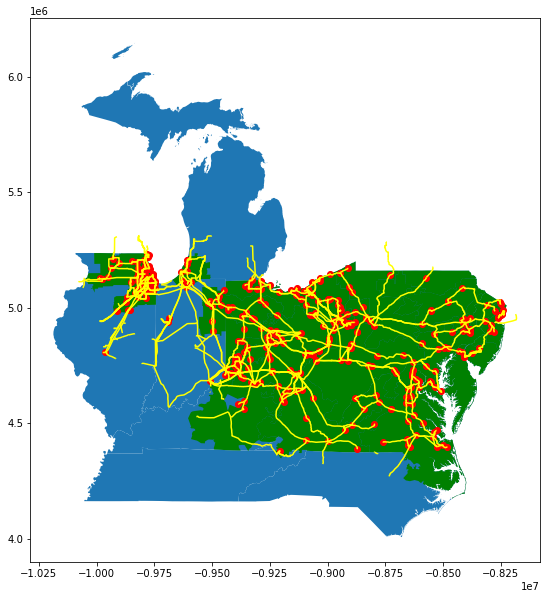

In [43]:
# get substation in lines data
substations = substations[substations.SUBSTATION_GLOBALID.isin(lines.SUBSTATION_A_GLOBALID) | substations.SUBSTATION_GLOBALID.isin(lines.SUBSTATION_B_GLOBALID)]

ax = states.plot(figsize=(30, 10))
pjm_zone.geometry.plot(ax=ax, color="green")
lines.geometry.plot(ax=ax, color="yellow")
# substations.geometry.plot(ax=ax, color="red")
substations[~substations.PLANNING_ZONE_NAME.isnull()].geometry.plot(ax=ax, color="red")

In [44]:
# load data

load = pd.read_csv("data/pjm_data_miner/hrl_load_metered_2015.csv")
load.datetime_beginning_utc = pd.to_datetime(load.datetime_beginning_utc)
load.datetime_beginning_ept = pd.to_datetime(load.datetime_beginning_ept)

In [45]:
load.head(2)

,datetime_beginning_utc,datetime_beginning_ept,nerc_region,mkt_region,zone,load_area,mw,is_verified
0,2015-01-01 05:00:00,2015-01-01,RFC,MIDATL,DPL,DPL,2437.433,True
1,2015-01-01 05:00:00,2015-01-01,RFC,MIDATL,PEP,PEP,3561.818,True


In [47]:
# method 1, use tranmission zone
# TODO: in the future, use load area, which requires further mapping based on EDC service areas
# TODO: in the future, use voronoi cell for better approximation

# get matching for load zone matching
mapping = {
    'Eastern Kentucky Power Cooperative': 'EKPC',
    'Duke Energy Ohio Kentucky': 'DEOK',
    'Commonwealth Edison Company': 'CE',
    'American Electric Power Co., Inc.': 'AEP',
    'American Transmission Systems, Inc.': 'ATSI',
    'Allegheny Power': 'AP',
    'Duquesne Light Company': 'DUQ',
    'Public Service Electric and Gas Company': 'PS',
    'Pennsylvania Electric Company': 'PN',
    'PECO Energy Company': 'PE',
    'Virginia Electric and Power Co.': 'DOM',
    'PPL Electric Utilities Corporation': 'PL',
    'Potomac Electric Power Company': 'PEP',
    'The Dayton Power and Light Co.': 'DAY',
    'Delmarva Power and Light Company': 'DPL',
    'Jersey Central Power and Light Company': 'JC',
    'Rockland Electric Company': 'RECO',
    'Metropolitan Edison Company': 'ME',
    'Baltimore Gas and Electric Company': 'BC',
    'Atlantic City Electric Company': 'AE',
    'Ohio Valley Electric Corporation': 'OVEC'
}

# check mapping
# zones = ['PS', 'PE', 'PL', 'BC', 'JC', 'ME', 'PN', 'PEP', 'AE',
#          'DPL', 'RECO', 'AP', 'CE', 'AEP', 'DAY', 'DUQ', 'DEOK',
#          'ATSI', 'EKPC', 'DOM']

for x in load.zone.unique():
    if x not in mapping.values():
        print(x)
        
print()

for x in mapping.values():
    if x not in load.zone.unique():
        print(x)


# replace commercial zones in substations
substations.COMMERCIAL_ZONE = substations.COMMERCIAL_ZONE.replace(mapping)

RTO

OVEC


In [48]:
# construct substation loads dataframe
# substations = substations[~substations.COMMERCIAL_ZONE.isin(["Null", "OVEC"])]

load_dict = {x:{} for x in substations.SUBSTATION_KEY}

# figure out share of the load for each substation
# TODO: currently equally divided between substations in a zone. Use Voronoi cells in the future.
substations["loadAreaShare"] = None

for z in substations.COMMERCIAL_ZONE.unique():
    if z is np.nan: # TODO: skip nans for now
        continue
    
    tmp = substations[substations.COMMERCIAL_ZONE == z]
    num_sub = tmp.shape[0]
    substations.loc[tmp.index, "loadAreaShare"] = 1/num_sub

In [49]:
# construct substation loads dataframe
for index, row in substations.iterrows():
    subKey = row["SUBSTATION_KEY"]
    loadAreaShare = row["loadAreaShare"]
    zone = row["COMMERCIAL_ZONE"]
    
    # if commercial zone is OVEC, skip
    # TODO
    if zone == "OVEC" or zone is np.nan:
        continue
    
    estimatedLoad = load[load.zone != "RTO"].groupby(["zone", "datetime_beginning_utc"]).sum().loc[zone] * loadAreaShare
    load_dict[subKey] = estimatedLoad.to_dict()['mw']

# construct DataFrame
pypsa_load = pd.DataFrame(load_dict)

# fillna TODO: not sure if this is the most optimal way
pypsa_load = pypsa_load.fillna(0)

# Reformat DataFrames for PyPSA

In [51]:
# define projection

project = partial(
    pyproj.transform,
    pyproj.Proj('epsg:3857'), # source coordinate system
    pyproj.Proj('epsg:4326')) # destination coordinate system

In [52]:
# format substation data for PyPSA as buses

# load dataframe, change and add some columns
# TODO: currently simply dropping all duplicates
pypsa_sub = substations.drop_duplicates().copy(deep=True)
pypsa_sub["frequency"] = 60
pypsa_sub["type"] = "substation"

# convert spatial reference to coordinates
pypsa_sub.geometry = pypsa_sub.geometry.apply(lambda x: transform(project, x))

# format dataframe for outputing
pypsa_sub["x"] = pypsa_sub.geometry.y
pypsa_sub["y"] = pypsa_sub.geometry.x #pypsa_sub.y.apply(lambda x: '{:.4f}'.format(x))
pypsa_sub["wkt_srid"] = "SRID=4326;POINT(" + pypsa_sub.x.astype(str) + " " + pypsa_sub.y.astype(str) + ")"
pypsa_sub = pypsa_sub[["SUBSTATION_KEY", "frequency", "COMMERCIAL_ZONE", "NAME", "type", "VOLTAGE", "wkt_srid", "x", "y"]]
pypsa_sub.columns = ["name", "frequency", "operator", "osm_name", "type", "voltage", "wkt_srid", "x", "y"]

In [53]:
# format lines

# get SUBSTATION_GLOBALID and SUBSTATION_KEY key_value pair
sub_dict = substations[["SUBSTATION_GLOBALID", "SUBSTATION_KEY", ]].drop_duplicates().set_index("SUBSTATION_GLOBALID").to_dict(orient="index")

# initialize key
pypsa_lines = {"name":[], "bus0":[], "bus1":[], "frequency":[], "length":[], "operator":[],
               "osm_name":[], "voltage":[], "s_nom":[]
              }

# iterate over rows
for index, row in lines.iterrows():
    try:
        name = row["TRANSMISSION_LINE_KEY"]
        bus0 = sub_dict[row["SUBSTATION_A_GLOBALID"]]["SUBSTATION_KEY"]
        bus1 = sub_dict[row["SUBSTATION_B_GLOBALID"]]["SUBSTATION_KEY"]
        frequency = 60
        length = row["LENGTH_KM"]
        operator = row["NAME"]
        osm_name = row["LINE_ID"]
        voltage = row["VOLTAGE"]
        s_nom = row["line_rating"]

        pypsa_lines["name"].append(name)
        pypsa_lines["bus0"].append(bus0)
        pypsa_lines["bus1"].append(bus1)
        pypsa_lines["frequency"].append(frequency)
        pypsa_lines["length"].append(length)
        pypsa_lines["operator"].append(operator)
        pypsa_lines["osm_name"].append(osm_name)
        pypsa_lines["voltage"].append(voltage)
        pypsa_lines["s_nom"].append(s_nom)
    except: # except handles lines that have np.nan as one of its substations
        print("can't append line: TRANSMISSION_LINE_KEY", row["TRANSMISSION_LINE_KEY"])

# initialize dataframe from dict
pypsa_lines = pd.DataFrame(pypsa_lines)

# drop lines where length is null
# TODO: find some other way in the future
# TODO: perhaps apporximate using path geometry or euclidean distance between substations
pypsa_lines = pypsa_lines[~pypsa_lines.length.isnull()]

can't append line: TRANSMISSION_LINE_KEY 41241
can't append line: TRANSMISSION_LINE_KEY 35714
can't append line: TRANSMISSION_LINE_KEY 33799
can't append line: TRANSMISSION_LINE_KEY 28692
can't append line: TRANSMISSION_LINE_KEY 42020
can't append line: TRANSMISSION_LINE_KEY 28303
can't append line: TRANSMISSION_LINE_KEY 33069
can't append line: TRANSMISSION_LINE_KEY 24404
can't append line: TRANSMISSION_LINE_KEY 28300
can't append line: TRANSMISSION_LINE_KEY 38782
can't append line: TRANSMISSION_LINE_KEY 40451
can't append line: TRANSMISSION_LINE_KEY 37354
can't append line: TRANSMISSION_LINE_KEY 33072
can't append line: TRANSMISSION_LINE_KEY 37368
can't append line: TRANSMISSION_LINE_KEY 28690
can't append line: TRANSMISSION_LINE_KEY 28441
can't append line: TRANSMISSION_LINE_KEY 28109
can't append line: TRANSMISSION_LINE_KEY 33808
can't append line: TRANSMISSION_LINE_KEY 25195
can't append line: TRANSMISSION_LINE_KEY 29423
can't append line: TRANSMISSION_LINE_KEY 42023
can't append 

In [54]:
plants

,Plant Code,Plant Name,Street Address,City,County,State,Latitude,Longitude,Balancing Authority Name,Transmission or Distribution System Owner,Generator ID,Unit Code,Technology,Prime Mover,RTO/ISO LMP Node Designation,RTO/ISO Location Designation for Reporting Wholesale Sales Data to FERC,geometry
111,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT1,NaN,Natural Gas Fired Combustion Turbine,GT,1123180710,88122101,POINT (-9362158.419 4562953.109)
112,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT10,NaN,Natural Gas Fired Combustion Turbine,GT,1123180711,8122110,POINT (-9362158.419 4562953.109)
113,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT2,NaN,Natural Gas Fired Combustion Turbine,GT,1123180712,88122102,POINT (-9362158.419 4562953.109)
114,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT3,NaN,Natural Gas Fired Combustion Turbine,GT,1123180713,88122103,POINT (-9362158.419 4562953.109)
115,54,J K Smith,12145 Irvine Road,Winchester,Clark,KY,37.8833,-84.1017,"PJM Interconnection, LLC","East Kentucky Power Coop, Inc",GT4,NaN,Natural Gas Fired Combustion Turbine,GT,1123180714,88122104,POINT (-9362158.419 4562953.109)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23885,62906,Augusta Solar Farm,99 Hampton House Rd,Newton,Sussex,NJ,41.1,-74.731,"PJM Interconnection, LLC",Jersey Central Power & Lt Co,AUGSF,NaN,Solar Photovoltaic,PV,NaN,NaN,POINT (-8319020.429 5027102.111)
23889,62910,MNCPPC Germantown Solar,18041 Central Park Circle,Boyds,Montgomery,MD,39.149,-77.3179,"PJM Interconnection, LLC",Potomac Electric Power Co,X0008,NaN,Solar Photovoltaic,PV,NaN,NaN,POINT (-8606994.601 4743042.384)
23891,62912,Solar Hagerstown,1260 Security Rd,Hagerstown,Washington,MD,39.6491,-77.6784,"PJM Interconnection, LLC",Potomac Electric Power Co,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8647116.594 4815085.043)
23897,62918,Notre Dame Hydro,South Niles Ave,South Bend,St Joseph,IN,41.676,-86.2453,"PJM Interconnection, LLC",Indiana Michigan Power Co,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-9600782.879 5112568.699)


In [ ]:
# format generators for PyPSA

# copy queue_merged into a geneartor dataframe
pypsa_gens = queue_merged[["Name", "MW In Service", "Fuel", "geometry"]].copy(deep=True)
pypsa_gens["substation"] = ""

# get subs that show up in lines
lst_of_subs = substations[substations.SUBSTATION_KEY.isin(pypsa_lines.bus0) | substations.SUBSTATION_KEY.isin(pypsa_lines.bus1)].copy(deep=True)
lst_of_subs["tmp_dist"] = None

# associate generators to closet subs
for index, row in pypsa_gens.iterrows():
    pt = row["geometry"]
    lst_of_subs["tmp_dist"] = lst_of_subs.geometry.apply(lambda x: pt.distance(x))
    
    min_sub = lst_of_subs[lst_of_subs.tmp_dist == min(lst_of_subs.tmp_dist)]
    min_sub = min_sub.SUBSTATION_KEY.to_list()[0]
    
    pypsa_gens.loc[index, "substation"] = min_sub

# reformat columns for pypsa
pypsa_gens = pypsa_gens[["Name", "substation", "MW In Service", "Fuel"]]
pypsa_gens.columns = ["name", "bus", "p_nom", "carrier"]

# get marginal cost
pypsa_gens["marginal_cost"] = 30

# drop null rows
# TODO: better handling in the future
pypsa_gens.dropna(inplace=True)

# set p_max_pu
# TODO: set the actual p_max_pu for renewable
# pypsa_gens["p_max_pu"] = 1

# deal with duplicates
# TODO: figure out why they are duplicates in the future
pypsa_gens.drop_duplicates(subset="name", inplace=True)

In [ ]:
queue_merged[queue_merged.Name == "Arnold 115kV"]

In [ ]:
substations[substations.SUBSTATION_KEY == "79429"]

In [ ]:
pypsa_gens

In [ ]:
# TODO
# QA/QC on gen-substation approximation

In [ ]:
pypsa_sub

In [ ]:
pypsa_sub

In [ ]:
pypsa_load

In [ ]:
pypsa_gens.groupby("carrier").sum()

In [ ]:
tmp = pd.read_csv("data/gen_by_fuel_2019.csv")
tmp.datetime_beginning_utc = pd.to_datetime(tmp.datetime_beginning_utc)
tmp = tmp[["datetime_beginning_utc", "fuel_type", "mw"]]

tmp.pivot(index="datetime_beginning_utc", columns="fuel_type", values="mw")

# Export Data

In [ ]:
# export csv

pypsa_dir = "data/pjm_system_map_pypsa"

# export dataframes
pypsa_sub.to_csv(os.path.join(pypsa_dir, "buses.csv"), index=False)
pypsa_lines.to_csv(os.path.join(pypsa_dir, "lines.csv"), index=False)
pypsa_gens.to_csv(os.path.join(pypsa_dir, "generators.csv"), index=False)
pypsa_load.to_csv(os.path.join(pypsa_dir, "loads-p_set.csv"))

# generate load name matching
tmp = pd.DataFrame(columns=["name", "bus"])
tmp["name"] = pypsa_sub["name"]
tmp["bus"] = pypsa_sub["name"]
tmp.to_csv(os.path.join(pypsa_dir, "loads.csv"), index=False)


# generate snapshots
tmp = pd.DataFrame(columns=["name", "weights"])
tmp["name"] = pypsa_load.index
tmp["weights"] = 1
tmp.to_csv(os.path.join(pypsa_dir, "snapshots.csv"), index=False)

# Start PyPSA

In [ ]:
# get PyPSA Network

csv_folder_name = "data/pjm_system_map_pypsa"

network = pypsa.Network(csv_folder_name=csv_folder_name)

In [ ]:
fig,ax = plt.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()})

fig.set_size_inches(10,10)

load_distribution = network.loads_t.p_set.loc[network.snapshots[0]].groupby(network.loads.bus).sum()

network.plot(bus_sizes=0.00005*load_distribution,ax=ax,title="Load distribution")

In [ ]:
pypsa_gens.carrier.unique()

In [ ]:
fig,ax = plt.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()})
fig.set_size_inches(10,10)

gens = network.generators[network.generators.carrier == "Natural Gas"]
gen_distribution = gens.groupby("bus").sum()["p_nom"].reindex(network.buses.index,fill_value=0.)

network.plot(bus_sizes=0.0001*gen_distribution,ax=ax,title="Generation distribution")

In [ ]:
network.lines.s_nom = 1000

In [ ]:
# import export
# generator capacities

In [ ]:
network.generators.p_nom.sum()

In [ ]:
network.loads_t["p_set"].sum(axis=1)

In [ ]:
network.lines.s_nom

In [ ]:
group_size = 4

solver_name = "glpk"

print("Performing linear OPF for one day, {} snapshots at a time:".format(group_size))

network.storage_units.state_of_charge_initial = 0.

for i in range(int(24/group_size)):
    #set the initial state of charge based on previous round
    network.lopf(network.snapshots[group_size*i:group_size*i+group_size], solver_name=solver_name)
    